In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/sowja/OneDrive/Desktop/Data Science Programs/Data sets/mpg_raw.csv')

In [3]:
# Identify the dimension of dataset
df.shape

(398, 9)

In [4]:
# Identify the summary of dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
# Identify the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# To find the null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

array([[<Axes: title={'center': 'displacement'}>]], dtype=object)

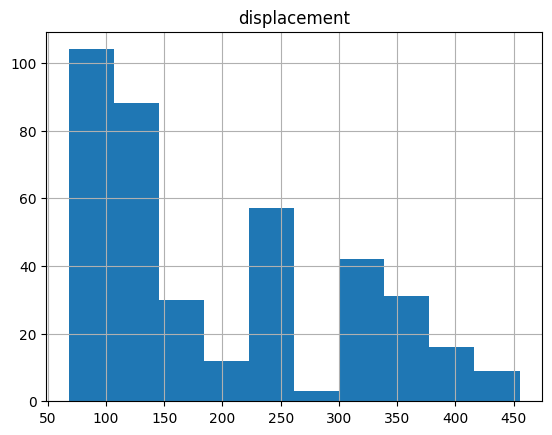

In [13]:
# To plot the histogram
df.hist(["displacement"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b5d9711c0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b5d971700>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b5d960ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b5d971c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b5d971ee0>],
 'means': []}

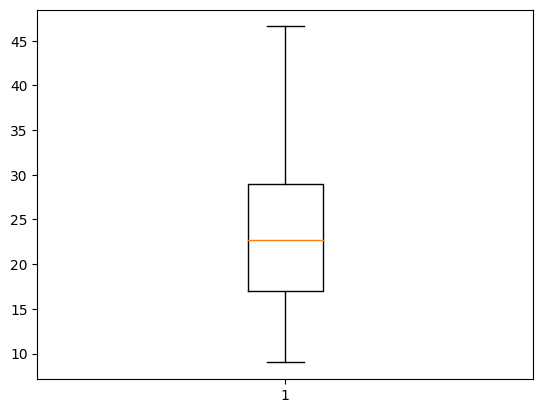

In [14]:
# Recognize the outliners using box plot
plt.boxplot(df['mpg'])

In [15]:
# Create box plot for outliner treatment
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower, upper)

17.0
29.0
12.0
-1.0 47.0


{'whiskers': [<matplotlib.lines.Line2D at 0x13b5d9e5670>,
 'caps': [<matplotlib.lines.Line2D at 0x13b5d9e5bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b5d9e53d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b5d9f5130>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b5d9f53d0>],
 'means': []}

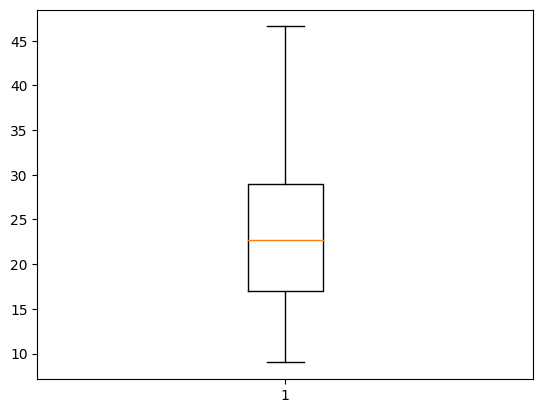

In [16]:
df = df[(df['mpg'] >= lower) & (df['mpg'] <= upper)]
plt.boxplot(df['mpg'])

<Axes: xlabel='mpg'>

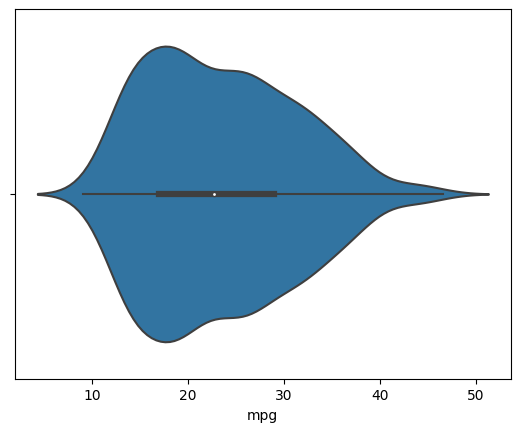

In [17]:
# Draw volin plot
sns.violinplot(data = df, x='mpg')

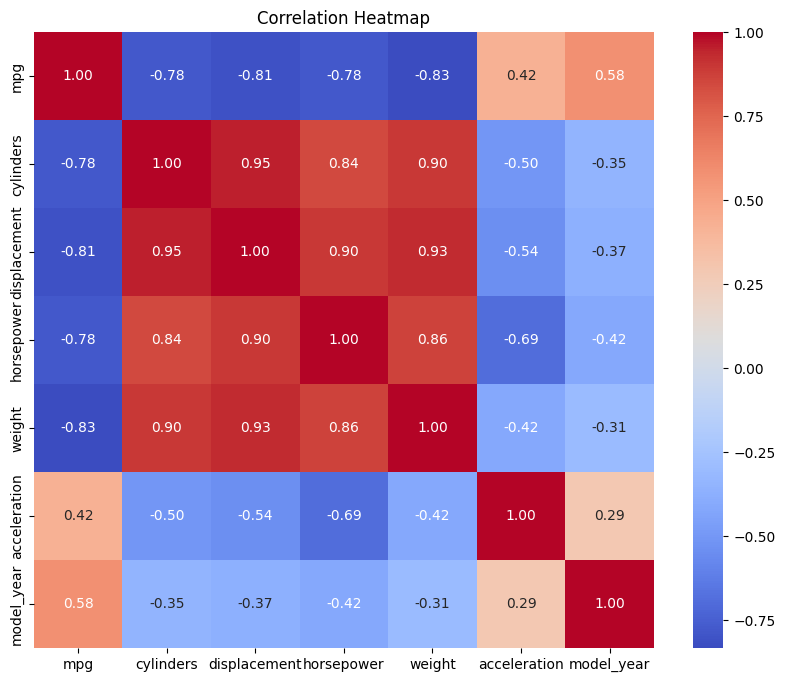

In [33]:

numeric_df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Display heat map(different method)
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = "coolwarm")

In [19]:
# Standardise the contionous variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
con = df.select_dtypes(include=["int64", "float64"]).columns
standard = scaler.fit_transform(df[con])
print(standard)

[[-0.69863841  1.48394702  1.07728956 ...  0.62054034 -1.285258
  -1.62531533]
 [-1.08349824  1.48394702  1.48873169 ...  0.84333403 -1.46672362
  -1.62531533]
 [-0.69863841  1.48394702  1.1825422  ...  0.54038176 -1.64818924
  -1.62531533]
 ...
 [ 1.09737414 -0.86401356 -0.56847897 ... -0.80463202 -1.4304305
   1.63640964]
 [ 0.5842277  -0.86401356 -0.7120053  ... -0.41562716  1.11008813
   1.63640964]
 [ 0.96908753 -0.86401356 -0.72157372 ... -0.30364091  1.40043312
   1.63640964]]


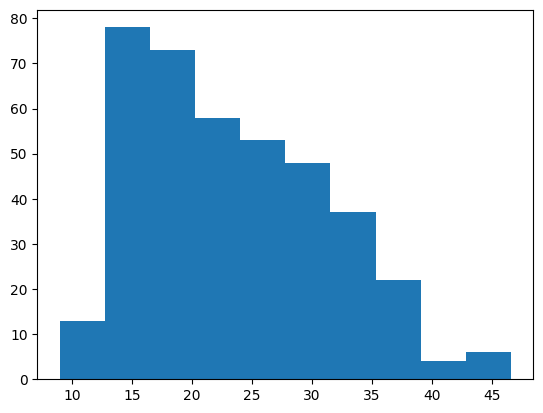

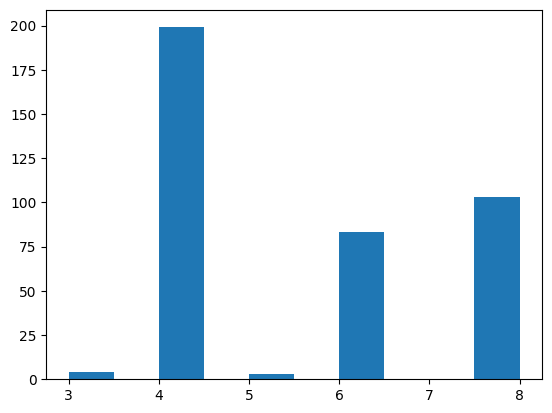

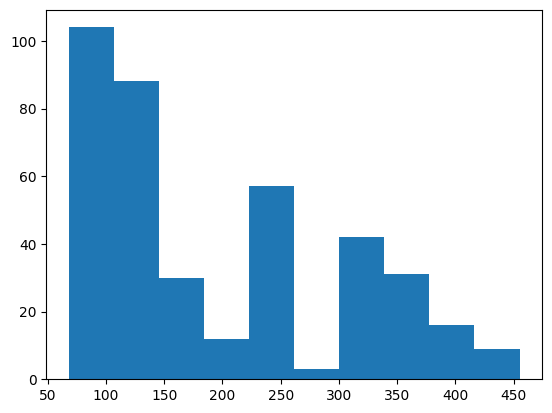

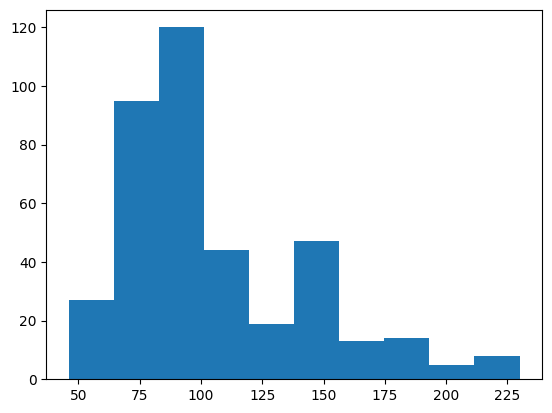

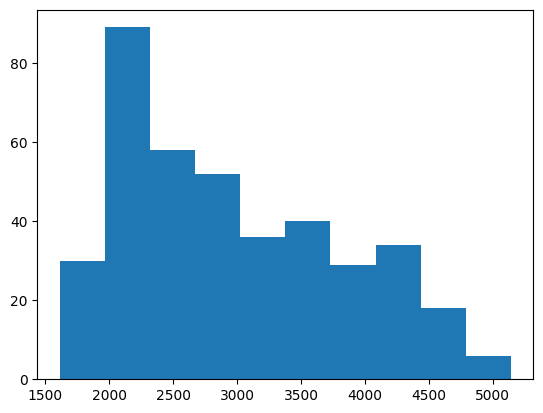

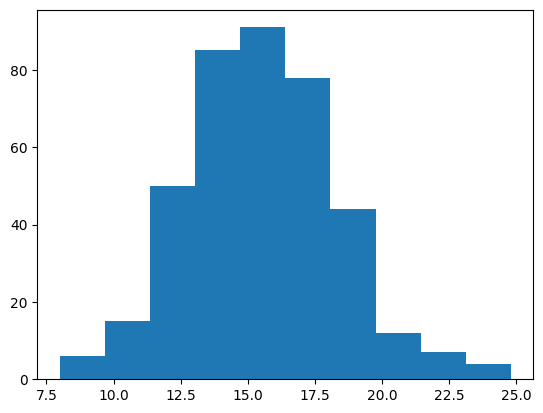

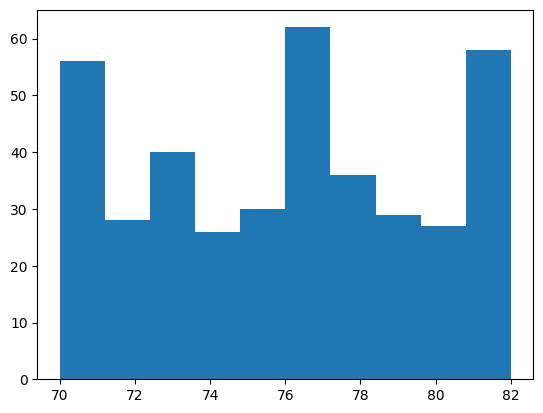

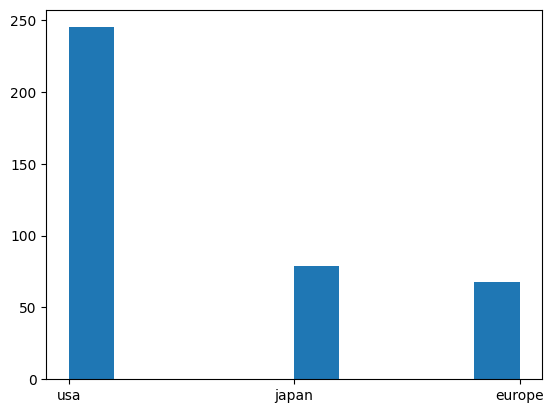

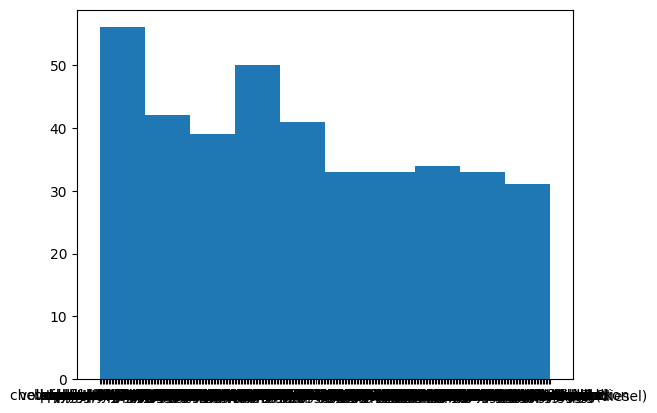

In [20]:
scales = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
for i in scales:
    plt.hist(df[i])
    plt.show()